# Heart Disease Model

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
heart = pd.read_csv('/Users/anya/Downloads/heart.csv')

In [6]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Exploratory Data Analysis

In [9]:
sns.set_theme()

Data visualization is a useful tool in comparing these features of patients to find the most correlated attributes with the presence of heart disease.
Various plot types such as heatmaps, countplots, barplots, and histplots help find common patterns between patients with and without heart disease. My code
includes a few of these plots to compare and contrast patients. 

More people have heart disease.
More females have heart disease than males; more females are included in this dataset

<AxesSubplot:xlabel='target', ylabel='count'>

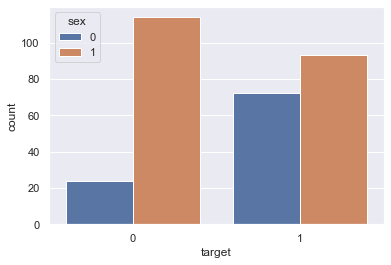

In [10]:
sns.countplot(x='target',data=heart,hue='sex') 

Most patients are ages 50-60.

<AxesSubplot:ylabel='Frequency'>

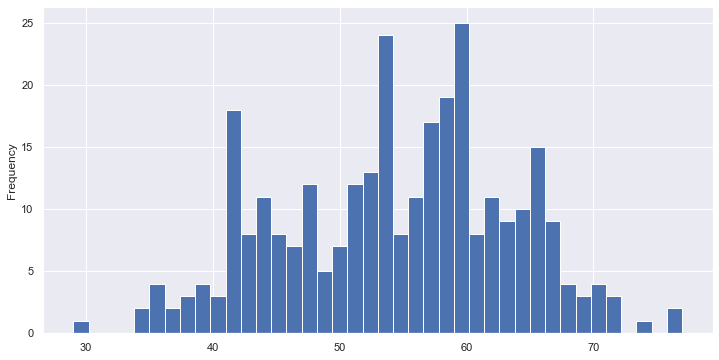

In [11]:
plt.figure(figsize=(12,6))
heart['age'].plot(kind='hist',bins=40)

In [12]:
heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Attribute info: 
- age
- sex
-  pain type (4 values)
- resting blood pressure
- serum cholestoral in mg/dl
- fasting blood sugar > 120 mg/dl
- resting electrocardiographic results (values 0,1,2)
- maximum heart rate achieved
- exercise induced angina
- oldpeak = ST depression induced by exercise relative to rest
- the slope of the peak exercise ST segment
- number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

<AxesSubplot:>

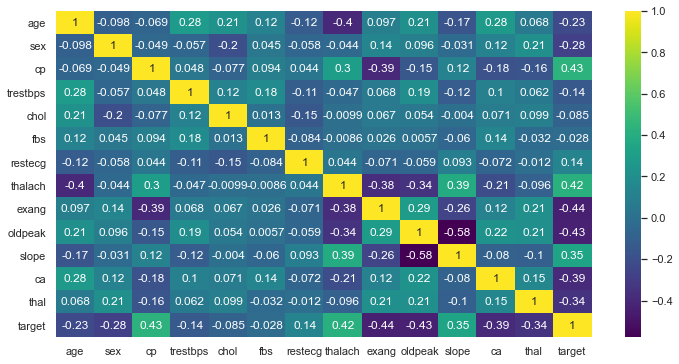

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(heart.corr(),cmap='viridis',annot=True)

Using a heatmap, we can get the most correlated features with target.

Most correlated features:
- slope (slope of peak exercise ST segment) -> 35% correlated

- thalach (max heart rate achieved) -> 42% correlated

- restecg (resting electrocadiographic results) -> %14 correlated

- cp (chest pain type) -> 43% correlated (most correlated feature with target) 

<AxesSubplot:xlabel='cp', ylabel='target'>

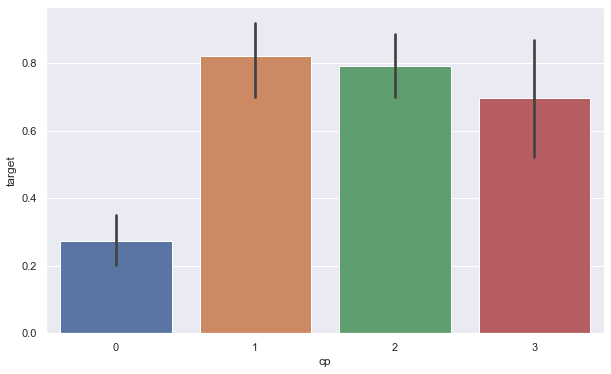

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x='cp',y='target',data=heart)

Chest pain of 1 is the most common.

<AxesSubplot:xlabel='restecg', ylabel='count'>

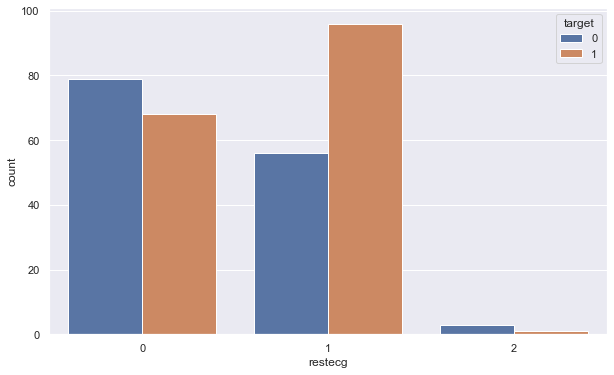

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='restecg',data=heart,hue='target')

Most people who had heart disease have a restcg of 1.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

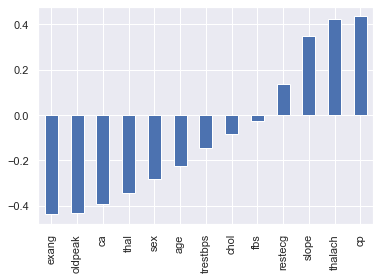

In [16]:
heart.corr()['target'][:-1].sort_values().plot(kind='bar')
plt.tight_layout

 Visual representation (bar chart) showing most correlated features with target column.

<AxesSubplot:ylabel='Frequency'>

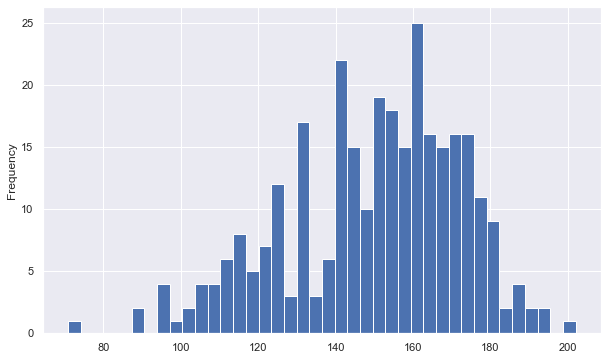

In [17]:
plt.figure(figsize=(10,6))
heart['thalach'].plot(kind='hist',bins=40)

Most people have a thalach between 140 and 170.

<AxesSubplot:xlabel='slope', ylabel='count'>

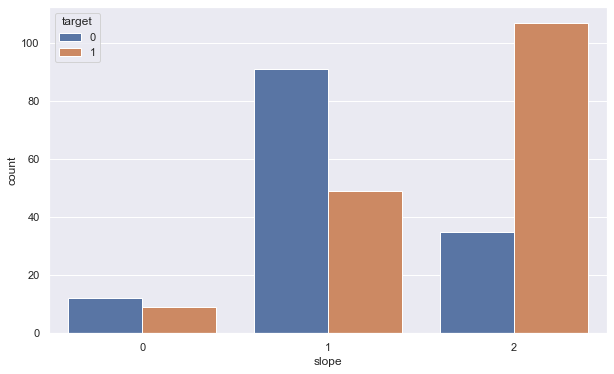

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='slope',data=heart,hue='target')

Most affected people have a slope of 2

## Data PreProcessing 

In [53]:
plt.figure(figsize=(12,6))
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Figure size 864x432 with 0 Axes>

No null values

In [54]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Data is already cleaned -> no need to fill in missing data or convert data to numerical data.

## Train Test Split

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [25]:
X = heart.drop('target',axis=1).values
y = heart['target'].values

In [26]:
print(len(heart)) # data size is small

303


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Features scaling (also known as Standardization) helps normalise the data within a specific range. This ensures
more accurate results as the model does not have to process large ranges of data. MinMaxScaler transforms the data
such that it is all within a given range.

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#:~:text=Transform%20features%20by%20scaling%20each,e.g.%20between%20zero%20and%20one.

In [28]:
from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
X_train = scaler.fit_transform(X_train)

In [31]:
X_test = scaler.transform(X_test)

## Create Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [33]:
model = Sequential()

model.add(Dense(40,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(20,activation='relu'))
model.add(Dropout(0.2))

# BINARY CLASSIFICATION so use sigmoid for the last layer
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

Use of EarlyStopping and Dropout layers prevents overfitting of the data.

https://en.wikipedia.org/wiki/Early_stopping

https://keras.io/api/layers/regularization_layers/dropout/

In [35]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In order to fit the model, we pass in X_train, y_train, the number of epochs (number of times the model will 
work through the entire dataset, validation data (testing data), batch size (number of samples to work through 
before updating the model parameters), and early stopping.

In [36]:
model.fit(x=X_train,y=y_train,epochs=200,validation_data=(X_test,y_test),batch_size=30,callbacks=[early_stop])

Epoch 1/200
8/8 [==============================] - 2s 58ms/step - loss: 0.6958 - val_loss: 0.6837
Epoch 2/200
8/8 [==============================] - 0s 7ms/step - loss: 0.6763 - val_loss: 0.6748
Epoch 3/200
8/8 [==============================] - 0s 9ms/step - loss: 0.6760 - val_loss: 0.6679
Epoch 4/200
8/8 [==============================] - 0s 7ms/step - loss: 0.6617 - val_loss: 0.6596
Epoch 5/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6531 - val_loss: 0.6514
Epoch 6/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6493 - val_loss: 0.6434
Epoch 7/200
8/8 [==============================] - 0s 6ms/step - loss: 0.6417 - val_loss: 0.6333
Epoch 8/200
8/8 [==============================] - 0s 7ms/step - loss: 0.6316 - val_loss: 0.6227
Epoch 9/200
8/8 [==============================] - 0s 7ms/step - loss: 0.6288 - val_loss: 0.6115
Epoch 10/200
8/8 [==============================] - 0s 7ms/step - loss: 0.6246 - val_loss: 0.5987
Epoch 11/200
8/8 [==========

8/8 [==============================] - 0s 7ms/step - loss: 0.3582 - val_loss: 0.3258
Epoch 85/200
8/8 [==============================] - 0s 8ms/step - loss: 0.3400 - val_loss: 0.3229
Epoch 86/200
8/8 [==============================] - 0s 7ms/step - loss: 0.3498 - val_loss: 0.3230
Epoch 87/200
8/8 [==============================] - 0s 8ms/step - loss: 0.3337 - val_loss: 0.3239
Epoch 88/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3629 - val_loss: 0.3206
Epoch 89/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3429 - val_loss: 0.3204
Epoch 90/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3917 - val_loss: 0.3190
Epoch 91/200
8/8 [==============================] - 0s 7ms/step - loss: 0.3541 - val_loss: 0.3170
Epoch 92/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3469 - val_loss: 0.3154
Epoch 93/200
8/8 [==============================] - 0s 6ms/step - loss: 0.3346 - val_loss: 0.3145
Epoch 94/200
8/8 [===============

## Model Evaluation

<AxesSubplot:>

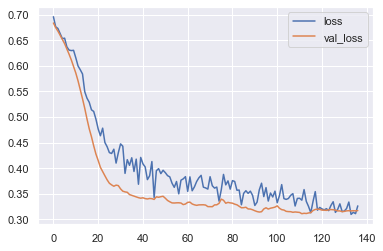

In [37]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

Eventually, the validation loss goes below the loss. This is ideal as the loss is reaching a minimum point, and overfitting is not occuring.

In [38]:
predictions = model.predict_classes(X_test)

/Users/anya/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        44
           1       0.87      0.87      0.87        47

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

[[38  6]
 [ 6 41]]


<AxesSubplot:xlabel='target', ylabel='count'>

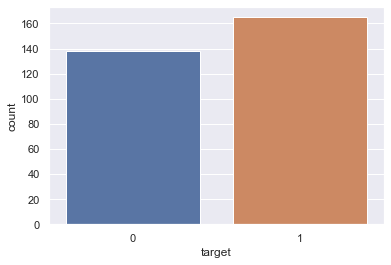

In [41]:
sns.countplot(x='target',data=heart) # fairly balanced 

Recall is most important because we need to detect all the true positives of heart disease. It is the most important that recall is high for all positive cases. Accuracy is ok because the data set is fairly balanced. Precision is less important than recall in this case.

In [42]:
from tensorflow.keras.models import load_model

In [43]:
model.save('heart-disease-predictor.h5')

In [44]:
model_loss # loss vs. val loss 

,loss,val_loss
0,0.695924,0.683731
1,0.676297,0.674775
2,0.673080,0.667916
3,0.663207,0.659623
4,0.653081,0.651377
...,...,...
132,0.334015,0.317113
133,0.309874,0.316722
134,0.313965,0.317112
135,0.311391,0.316801


# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
logmodel = LogisticRegression()

In [47]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [48]:
predictions = logmodel.predict(X_test)

In [49]:
from sklearn.metrics import classification_report, confusion_matrix

In [50]:
print(classification_report(y_test,predictions))
confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.88      0.80      0.83        44
           1       0.82      0.89      0.86        47

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.85        91
weighted avg       0.85      0.85      0.85        91



array([[35,  9],
       [ 5, 42]])